In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools
import pytz 
import re
import ast
import string
import nltk
import googletransx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud, STOPWORDS
from googletransx import Translator
from datetime import datetime,timedelta

#nltk.download('punkt')
#nltk.download('stopwords')
import os
import requests

In [3]:
df = pd.read_csv('twet_data.csv')
df.head()

,username,date,tweet,link
0,jakulunlappung,2022-12-03,Garut Sisca Innalillahi Pangandaran Kebumen Ba...,https://twitter.com/jakulunlappung/status/1598...
1,pkartawidjaja,2022-12-03,@MrsRachelIn @NasDem @Metro_TV @mohmahfudmd @K...,https://twitter.com/PKartawidjaja/status/15989...
2,sanyalkadrie,2022-12-03,@geloraco Contoh jelasnya PJ Gub DKI.. serasa ...,https://twitter.com/sanyalkadrie/status/159898...
3,_4iii_na_t3h5h,2022-12-03,@DeeRose782 Begini nih kalau ODGJ diijinkan ik...,https://twitter.com/_4iii_Na_T3H5h/status/1598...
4,tommyesa78,2022-12-03,Se arogan ini kah mereka? Begitu bernafsunya m...,https://twitter.com/Tommyesa78/status/15989881...


In [4]:
def tl(x,src):
    trans = Translator()
    try:
        twet = trans.translate(x, src=src, dest='id').text
    except:
        twet = x
    return twet

In [5]:
#df['tweet'] = df.apply(lambda x: tl(x['tweet'] if else, 'en'),axis=1)

## Cleaning

In [6]:
txt = df['tweet'].copy()

In [7]:
pd.set_option('display.max_colwidth',100)
txt.head()

0    Garut Sisca Innalillahi Pangandaran Kebumen Bandung Jepang vs Maroko sulli Cilacap Soleh Ya Alla...
1    @MrsRachelIn @NasDem @Metro_TV @mohmahfudmd @KPU_ID Kami siap tenggelamkan Partai pendukung Bapa...
2                                    @geloraco Contoh jelasnya PJ Gub DKI.. serasa dia Gub hasil pemilu.
3                                               @DeeRose782 Begini nih kalau ODGJ diijinkan ikut pemilu🤭
4    Se arogan ini kah mereka? Begitu bernafsunya mereka ingin memenangkan pemilu?  Apa yg dilakukan ...
Name: tweet, dtype: object

In [8]:
'''
stopwords = stopwords.words('indonesian')
stopwords.clear()
stopwords.extend(custom_stop)
print(stopwords[:3])
'''

"\nstopwords = stopwords.words('indonesian')\nstopwords.clear()\nstopwords.extend(custom_stop)\nprint(stopwords[:3])\n"

In [9]:
def rep_aggregate(x):
    word_tokens = word_tokenize(x)
    x1 = ''
    for i in word_tokens:
        if i == 'pemilu':
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            x1 = x1 + new + ' '

In [10]:

def clean_twt(twt):
    txt1 = open("CleanerText\clean_stopwords.txt","r")
    stoptxt = txt1.read().split("\n")
    txt2 = open("CleanerText\clean_slangwords2.txt","r")
    cont = txt2.read()
    slangtxt = ast.literal_eval(cont)
    txt3 = open("CleanerText\clean_slangwords.txt","r")
    cont2 = txt3.read()
    slangtxt2 = ast.literal_eval(cont2)
    
    txt1.close()
    txt2.close()
    txt3.close()

    twt = re.sub(r'[^\x00-\x7F]+',' ' ,twt)
    twt = re.sub(r'http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%\-\+!]+',' ' ,twt)
    twt = re.sub(r'pic.twitter.com?.[a-zA-Z0-9\.\/\_?=%\-\+!]+',' ' ,twt)
    twt = re.sub(r'\@([\w]+)',' ' ,twt)
    twt = re.sub(r'\#([\w]+)',' ' ,twt)
    twt = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]',' ' ,twt)    
    twt = re.sub('[^a-zA-Z]',' ' ,twt)
    twt = re.sub(r'([a-zA-Z])\1\1','\\1' ,twt)
    twt = re.sub(r'[0-9]+',' ' ,twt)
    twt = re.sub(r'‚Ä¶','' ,twt)
    twt = re.sub(r'â','' ,twt)
    twt = re.sub(r'€','' ,twt)
    twt = re.sub(r'¦','' ,twt)
    twt = re.sub(' +',' ' ,twt)
    twt = re.sub(r'^[ ]|[ ]$','' ,twt)
    twt = twt.lower()

    word_tokens = word_tokenize(twt)
    for i in word_tokens:
        if i in slangtxt.keys():
            word_tokens[word_tokens.index(i)] = slangtxt[i]
    for i in word_tokens:
        if i in slangtxt2.keys():
            word_tokens[word_tokens.index(i)] = slangtxt2[i]
    
    filt_twt = [i for i in word_tokens if not i in stoptxt]
    filt_twt = []

    for i in word_tokens:
        if i not in stoptxt and i not in string.punctuation:
            filt_twt.append(i.lower())
    return ' '.join(filt_twt)

In [11]:
clean_txt = txt.apply(lambda x: clean_twt(x))

In [12]:
pd.set_option('display.max_colwidth',100)
clean_txt.head()

0    garut sisca innalillahi pangandaran kebumen bandung jepang vs maroko sulli cilacap soleh allah b...
1                                  tenggelamkan partai pendukung politik identitas tunggu pemilihan umum
2                                             contoh jelasnya pj gub dki serasa gub hasil pemilihan umum
3                                                                          odgj diijinkan pemilihan umum
4    arogan bernafsunya memenangkan pemilihan umum aliansi milenial benar tidak kampanye salahnya wil...
Name: tweet, dtype: object

In [13]:
#keyword source atau place/country
def del_twt(twt):
    key_useless = open("CleanerText\clean_key_useless.txt","r")
    keywords = key_useless.read().split()
    key_useless.close()
    i = len(keywords)
    word_tokens = word_tokenize(twt)
    twt2 = ''
    for x in word_tokens:
        if x not in keywords:
            twt2 = twt2+x+' '
    return twt2

In [14]:
clear_txt = clean_txt.apply(lambda x: del_twt(x))
pd.set_option('display.max_colwidth',100)
clear_txt.head()

0    garut sisca innalillahi pangandaran kebumen bandung jepang vs maroko sulli cilacap soleh allah b...
1                                                tenggelamkan partai pendukung politik identitas tunggu 
2                                                           contoh jelasnya pj gub dki serasa gub hasil 
3                                                                                        odgj diijinkan 
4    arogan bernafsunya memenangkan aliansi milenial benar kampanye salahnya wilayah aceh bertindak a...
Name: tweet, dtype: object

In [15]:
def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

In [16]:
dt = df.copy()
dt.head(1)

,username,date,tweet,link
0,jakulunlappung,2022-12-03,Garut Sisca Innalillahi Pangandaran Kebumen Bandung Jepang vs Maroko sulli Cilacap Soleh Ya Alla...,https://twitter.com/jakulunlappung/status/1598988753141366785


In [17]:
dt['tweet'] = clear_txt
dt['wordlen'] = dt['tweet'].apply(lambda x: count_words(x))
dt['wordlen'].value_counts().sort_index()

0      6
1     19
2     39
3     49
4     67
5     68
6     92
7     56
8     59
9     61
10    65
11    46
12    38
13    26
14    30
15    27
16    38
17    23
18    24
19    24
20    18
21    23
22    23
23    30
24    14
25     8
26    10
27     8
28     5
29     3
30     4
31     2
32     1
33     1
Name: wordlen, dtype: int64

In [18]:
dt.loc[0]

username                                                                                         jakulunlappung
date                                                                                                 2022-12-03
tweet       garut sisca innalillahi pangandaran kebumen bandung jepang vs maroko sulli cilacap soleh allah b...
link                                              https://twitter.com/jakulunlappung/status/1598988753141366785
wordlen                                                                                                      17
Name: 0, dtype: object

In [19]:
dt = dt.drop(dt[dt['wordlen'] == 0].index, axis=0)
dt['tweet'].drop_duplicates(inplace=True)
dt.drop(labels=0, axis=0,inplace=True)
dt = dt.reset_index(drop=True)

In [20]:
len(dt)

1000

In [21]:
word_dict = {}
for i in range(0, len(dt['tweet'])):
    kalimat = dt['tweet'][i]
    word_tokens = word_tokenize(kalimat)
    for j in word_tokens:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [22]:
len(word_dict)

3689

In [23]:
len({k:v for (k,v) in word_dict.items() if v < 4})

3099

In [24]:
lexi = pd.read_csv('CleanerText/full_lexicon.csv')
lexi.head()

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1


In [25]:
lexi[lexi['word']=='gila']

,word,weight,number_of_words
1766,gila,3,1
3791,gila,-4,1
4826,gila,-5,1
10243,gila,-5,1


In [26]:
len(lexi)

10286

In [27]:
lexi_w = lexi['word'].to_list()
lexi_wcount = lexi['number_of_words']

In [28]:
stem_word = []
stemmer = StemmerFactory().create_stemmer()
for w in word_dict.keys():
    if w not in lexi_w:
         base_w = stemmer.stem(w)
         if base_w not in lexi_w:
            stem_word.append(w)

In [29]:
len(stem_word)

2167

In [30]:
len({k:v for (k,v) in word_dict.items() if ((k in stem_word)&(v>3)) })

289

In [31]:
stem_word_list = {k:v for (k,v) in word_dict.items() if ((k in stem_word)&(v>3)) }

In [32]:
sort_orders = sorted(stem_word_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

kpu 160
rakyat 96
jokowi 93
partai 91
calon 66
ppk 64
bawaslu 63
amp 56
prabowo 55
anies 51
kabupaten 51
indonesia 49
kesiapan 46
maskot 46
demokrasi 43
tahapan 42
administrasi 42
seleksi 41
daerah 36
nasional 34


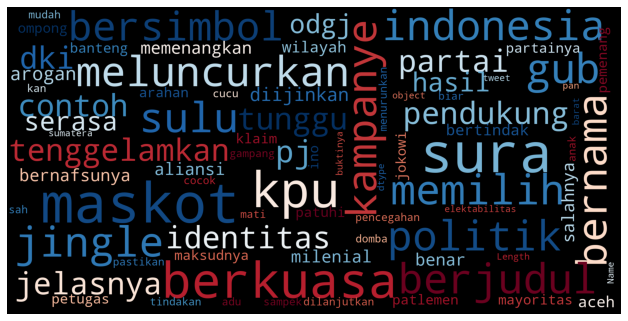

In [33]:
stpwords = set(STOPWORDS)
wrdcloud = WordCloud(
    stopwords=stpwords,
    max_words=100,
    max_font_size=36,
    scale=5,
    random_state=100,
    colormap='RdBu'
).generate(str(dt['tweet']))
fig = plt.subplots(1,figsize=(11,11), facecolor= None)
plt.axis('off')
plt.imshow(wrdcloud)
plt.show()

In [34]:
unslang = []
for i in range(0, len(clear_txt)):
    if 'odgj' in clear_txt[i]:
        unslang.append(clear_txt[i])
print(unslang)

['odgj diijinkan ']


In [37]:
sencol =[]
negasi = ['bukan','tidak','ga','gk']
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexi['weight'][lexi_w.index(word)]
    else:
        sentiment += lexi['weight'][lexi_w.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(dt)):
    nsen = senrow.shape[0]
    words = word_tokenize(dt['tweet'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexi_w :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexi_w:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexi_w):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexi_w:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [39]:
len(sentiment_list)

1000

In [45]:
np.hstack((senrow,sentiment_array))

array([[ 1,  1,  1, ...,  0,  0,  4],
       [ 0,  0,  0, ...,  0,  0,  4],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0, 13],
       [ 0,  0,  0, ...,  1,  0, 17],
       [ 0,  0,  0, ...,  0,  1, -2]], dtype=int64)

In [44]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
dt_sentimen = pd.DataFrame(sentiment_data,columns = sencol)

In [46]:
dt_sentimen.head()

,pendukung,politik,tunggu,jelas,hasil,menang,aliansi,benar,kampanye,salah,...,bertepatan,love,presiden,semau,pelantikan,unjuk,bernama,anak cucu,menurunkan,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [49]:
len(dt)

1000

In [53]:
df_poin = pd.DataFrame(dt[['username', 'tweet']])

In [54]:
df_poin['sentiment'] = dt_sentimen['sentiment']

In [65]:
df_poin.head()

,username,tweet,sentiment
0,pkartawidjaja,tenggelamkan partai pendukung politik identitas tunggu,4
1,sanyalkadrie,contoh jelasnya pj gub dki serasa gub hasil,4
2,_4iii_na_t3h5h,odgj diijinkan,0
3,tommyesa78,arogan bernafsunya memenangkan aliansi milenial benar kampanye salahnya wilayah aceh bertindak a...,2
4,bfitrikananda,maksudnya berkuasa klaim pemenang petugas partainya mayoritas patlemen berkuasa ino banteng ompong,4


In [66]:
df_end = df_poin.copy()
label = []
for i in df_end['sentiment']:
    if i > 0:
        label.append('Positif')
    elif i == 0:
        label.append('Netral')
    else:
        label.append('Negatif')
df_end['sentiment'] = label
df_end.head()

,username,tweet,sentiment
0,pkartawidjaja,tenggelamkan partai pendukung politik identitas tunggu,Positif
1,sanyalkadrie,contoh jelasnya pj gub dki serasa gub hasil,Positif
2,_4iii_na_t3h5h,odgj diijinkan,Netral
3,tommyesa78,arogan bernafsunya memenangkan aliansi milenial benar kampanye salahnya wilayah aceh bertindak a...,Positif
4,bfitrikananda,maksudnya berkuasa klaim pemenang petugas partainya mayoritas patlemen berkuasa ino banteng ompong,Positif


In [63]:
df_poin[df_poin['sentiment']<0]

,username,tweet,sentiment
11,deje_vendra,arahan jokowi terkait kesiapan pelaksanaan serentak,-7
17,bawaslu_krgsm,penyelesaian sengketa peserta salah kewenangan panwaslu kecamatan selengkapnya,-4
20,cengkonek2,memang warga kalbar dayak sepaham claim mah gampang buktikan fotocopy ktpnya kayak,-1
22,fajarvantano1,nasihat filsafat kayak sukses bangsa amp negara gerbang kemakmuran wonk boneka stir bandar pemen...,-3
23,jeykumbara06,sekenario cari untung sgla adakan biaya membengkak saku kpu menebal proyek kan junjungan mu leng...,-6
...,...,...,...
985,alexssupink,buka kades parah adu domba,-8
987,kpupontianak,pengumuman hasil seleksi administrasi panitia kecamatan ppk ade niy silelah dicek namenye link ye,-1
989,jawapos,kpu rumuskan kampanye politik adu gagasan,-1
991,nadya_khennis,kawal bawaslu ajak masyarakat waspadai bahaya politik identitas,-1


In [67]:
X = df_end['tweet']
Y = df_end['sentiment']

In [68]:
Y.value_counts()

Positif    621
Negatif    293
Netral      86
Name: sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler #untuk normalisasi
from sklearn import preprocessing #untuk processing data
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score #untuk evaluasi
from sklearn.metrics import confusion_matrix, classification_report # untuk melihat data positive true dan negative true serta akurasinya
from sklearn import model_selection

In [ ]:
'''
noteeee
lexi tidak memnerikan bobot pada word yang belum diketahui / << tidak bisa jadi patokan untuk use/nt
beberapa kata sulit di stop/slangword change

remember

'''

'\nnoteeee\nlexi tidak memnerikan bobot pada word yang belum diketahui / << tidak bisa jadi patokan untuk use/nt\nbeberapa kata sulit di stop/slangword change\n\nremember\n\n'

### Useless but Flawless

In [ ]:
'''
unfound = []
temp = []
for i in range(0, len(dt['tweet'])):
    kalimat = dt['tweet'][i]
    word_tokens = word_tokenize(kalimat)
    for j in word_tokens:
        if j not in lexi['word'].values:
            unfound.append(j)
'''

"\nunfound = []\ntemp = []\nfor i in range(0, len(dt['tweet'])):\n    kalimat = dt['tweet'][i]\n    word_tokens = word_tokenize(kalimat)\n    for j in word_tokens:\n        if j not in lexi['word'].values:\n            unfound.append(j)\n"